In [18]:
!pip install -e .

Obtaining file:///home/blei/pythonTexTools
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for python_tex_tools (pyproject.toml) ... done
  Created wheel for python_tex_tools: filename=python_tex_tools-0.0.1-0.editable-py3-none-any.whl size=15313 sha256=0d14ae67ec2e8af03d774e65c151e2df64c9595c0bc789f0c812e6b982f60817
  Stored in directory: /tmp/pip-ephem-wheel-cache-jpkffsqd/wheels/69/15/8c/8ccca7f20e266df8b55243020479942536516d5a43a4f89b72
Successfully built python_tex_tools
  Attempting uninstall: python_tex_tools
    Found existing installation: python_tex_tools 0.0.1
    Uninstalling python_tex_tools-0.0.1:
      Successfully uninstalled python_tex_tools-0.0.1


In [19]:
from python_tex_tools import TexExporter, make_plt_look_like_latex
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

test_exporter = TexExporter()

#### Figure Demo:

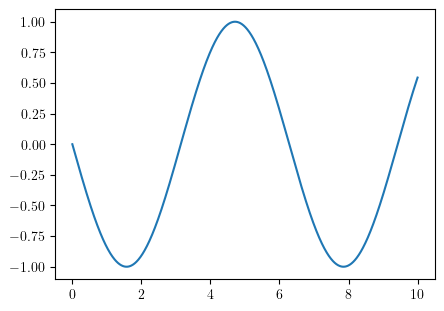

In [20]:
with make_plt_look_like_latex():
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    x = np.linspace(0, 10, 1000)
    y = -np.sin(x)

    ax.plot(x, y)

test_exporter.add_figure("TestFigure", fig)

#### Table Demo:

In [21]:
# Make a demo table
table = np.random.rand(2, 2).round(2)
table = pd.DataFrame(table)

# set row names
table.index = ["Row1", "Row2"]

# set col names
table.columns = ["Col1", "Col2"]

test_exporter.add_table("TestTable", table)
table

,Col1,Col2
Row1,0.69,0.29
Row2,0.83,0.23


#### Export Demo:

A file, containing the LaTeX function definitions is written to the directory, specified by the `export_path` attribute. Plots are placed at the same location as .PGF files.

In [22]:
import os

cwd = os.getcwd()
test_exporter.export(export_path=cwd)

Writing output to /home/blei/pythonTexTools/python_results.tex.
Exporting elements as LaTex functions. PGF files will be copied to the output directory.

Figures:
TestFigure.pgf

Tables:
\tabTestTable


## How to get this into Latex?

Put this into your preamble:



```
% For Python Tex Exporter
\usepackage{pgf}
\usepackage{lmodern}    
\usepackage{booktabs}

\input{<python_results>} % THE PATH TO YOUR python_results.tex

```


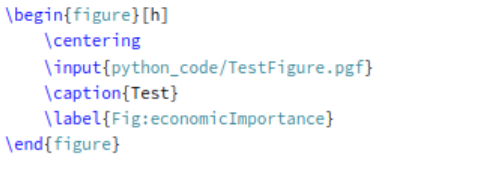

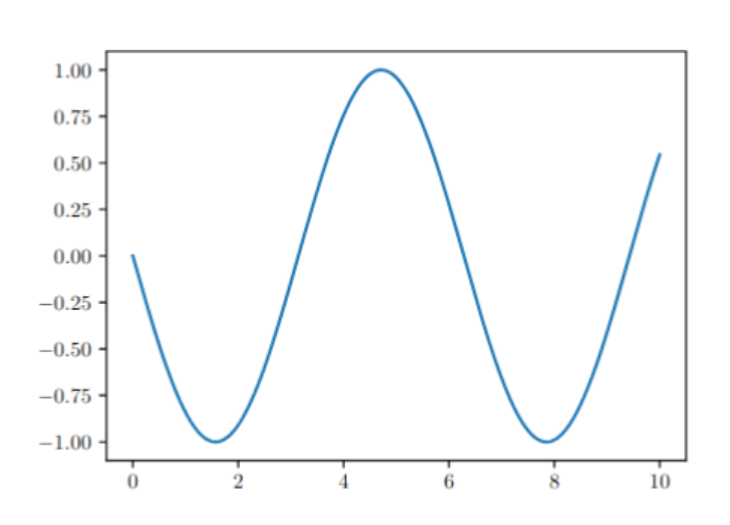